In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('ANZ synthesised transaction dataset.xlsx')
df.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


In [3]:
# Removing irrelevant information

df = df[["status","card_present_flag","account","long_lat","txn_description","balance","date","merchant_suburb","merchant_state",
                   "amount","customer_id","movement"]]
df.head()

,status,card_present_flag,account,long_lat,txn_description,balance,date,merchant_suburb,merchant_state,amount,customer_id,movement
0,authorized,1.0,ACC-1598451071,153.41 -27.95,POS,35.39,2018-08-01,Ashmore,QLD,16.25,CUS-2487424745,debit
1,authorized,0.0,ACC-1598451071,153.41 -27.95,SALES-POS,21.20,2018-08-01,Sydney,NSW,14.19,CUS-2487424745,debit
2,authorized,1.0,ACC-1222300524,151.23 -33.94,POS,5.71,2018-08-01,Sydney,NSW,6.42,CUS-2142601169,debit
3,authorized,1.0,ACC-1037050564,153.10 -27.66,SALES-POS,2117.22,2018-08-01,Buderim,QLD,40.90,CUS-1614226872,debit
4,authorized,1.0,ACC-1598451071,153.41 -27.95,SALES-POS,17.95,2018-08-01,Mermaid Beach,QLD,3.25,CUS-2487424745,debit


In [4]:
df.describe()

,card_present_flag,balance,amount
count,7717.000000,12043.000000,12043.000000
mean,0.802644,14704.195553,187.933588
std,0.398029,31503.722652,592.599934
min,0.000000,0.240000,0.100000
25%,1.000000,3158.585000,16.000000
50%,1.000000,6432.010000,29.000000
75%,1.000000,12465.945000,53.655000
max,1.000000,267128.520000,8835.980000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 12 columns):
status               12043 non-null object
card_present_flag    7717 non-null float64
account              12043 non-null object
long_lat             12043 non-null object
txn_description      12043 non-null object
balance              12043 non-null float64
date                 12043 non-null datetime64[ns]
merchant_suburb      7717 non-null object
merchant_state       7717 non-null object
amount               12043 non-null float64
customer_id          12043 non-null object
movement             12043 non-null object
dtypes: datetime64[ns](1), float64(3), object(8)
memory usage: 1.1+ MB


In [6]:
tran_vol = df.amount.groupby(df.account)
#(29-july-2018 - 30-oct-2018)
print('Total no. of transactions: ',tran_vol.count().sum())
print('Avg no. of transactions/ month: ',int(tran_vol.count().sum()/3))
print('Max vol of transactions by an account: ',tran_vol.count().max())
print('Max transaction amount an account: ',int(tran_vol.mean().sum()))

Total no. of transactions:  12043
Avg no. of transactions/ month:  4014
Max vol of transactions by an account:  578
Max transaction amount an account:  22886


In [7]:
# Total number of Transactions made by each account

print(tran_vol.count())

account
ACC-1037050564    259
ACC-1056639002     86
ACC-1199531521     77
ACC-1217063613     25
ACC-1222300524    303
ACC-1243371644     80
ACC-1279356312    116
ACC-1334819143    139
ACC-1344825761     86
ACC-1349834573    144
ACC-1424176027     55
ACC-1438600314     81
ACC-1443681913    137
ACC-1496451953    163
ACC-1516130869    163
ACC-1523339231     78
ACC-154431271      97
ACC-1598451071    578
ACC-1608363396    129
ACC-1650504218     84
ACC-1652235822    118
ACC-1683215619    122
ACC-1710017148    178
ACC-1788473090     76
ACC-1799207998    166
ACC-182446574     292
ACC-1890605467     91
ACC-1903037542    233
ACC-1973887809    115
ACC-1990648130    124
                 ... 
ACC-3741880913     75
ACC-37709441      145
ACC-3771436525    141
ACC-3827517394    165
ACC-3879258709    151
ACC-3881031190     37
ACC-38923874      102
ACC-3941181087     62
ACC-3954677887    110
ACC-4059612845     31
ACC-4065652575    100
ACC-414431115     124
ACC-4163822186     60
ACC-4258502723    260
AC

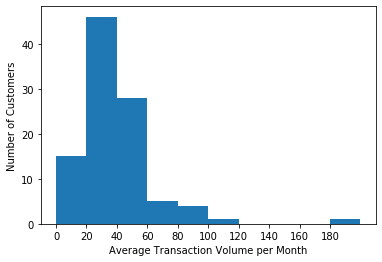

In [8]:
 # histogram to show Average Transaction Volume per month
Avg_tran_vol = tran_vol.count()/3

plt.hist(Avg_tran_vol, bins = range(0,int(max(Avg_tran_vol))+20,20))      
plt.xlabel('Average Transaction Volume per Month')
plt.ylabel('Number of Customers')
plt.xticks(np.arange(0, max(Avg_tran_vol)+1, 20.0))
plt.show()

In [9]:
# Mean transaction amount by each account

print(tran_vol.mean())

account
ACC-1037050564     74.465019
ACC-1056639002    265.134767
ACC-1199531521    418.742468
ACC-1217063613    426.108800
ACC-1222300524     78.206106
ACC-1243371644    183.653000
ACC-1279356312    200.197500
ACC-1334819143    164.179137
ACC-1344825761    228.021163
ACC-1349834573    197.844028
ACC-1424176027    278.633818
ACC-1438600314    217.716296
ACC-1443681913    153.332336
ACC-1496451953    261.891411
ACC-1516130869    168.607423
ACC-1523339231    515.583846
ACC-154431271     159.418454
ACC-1598451071     45.348772
ACC-1608363396    159.304186
ACC-1650504218    314.383571
ACC-1652235822    127.645254
ACC-1683215619    157.549180
ACC-1710017148    205.839382
ACC-1788473090    226.721184
ACC-1799207998    167.005904
ACC-182446574      99.569658
ACC-1890605467    304.375604
ACC-1903037542     77.681888
ACC-1973887809    192.534870
ACC-1990648130    151.694274
                     ...    
ACC-3741880913    274.614800
ACC-37709441      234.624138
ACC-3771436525    145.500426
ACC-38

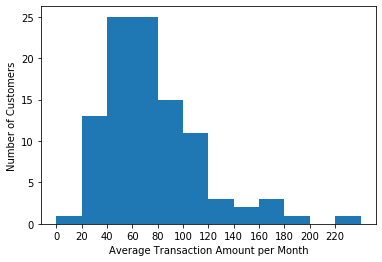

In [10]:
# histogram to show Average Transaction Amount per month
Avg_tran_amnt = tran_vol.mean()/3

plt.hist(Avg_tran_amnt,bins = range(0,int(max(Avg_tran_amnt))+20,20))
plt.xlabel('Average Transaction Amount per Month')
plt.ylabel('Number of Customers')
plt.xticks(np.arange(0, max(Avg_tran_amnt)+1, 20.0))
plt.show()